In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

counter = 0


def moltosvg(mol, molSize=(450, 150), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    global counter
    # with open(f"mol{counter}.svg", "w") as filehandle:
    #    filehandle.write(svg)
    # print(counter)
    counter += 1
    return svg


def render_svg(svg):
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return SVG(svg.replace("svg:", ""))

In [2]:
# import pydot
import networkx as nx
import matplotlib.pyplot as plt


def render_graph(mol_gen, residues):
    # pydot_graph = nx.drawing.nx_pydot.to_pydot(mol_gen.graph)
    # return render_svg(pydot_graph.create_svg().decode("utf-8"))
    fig, ax = plt.subplots()
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    node_list = list(mol_gen.graph.nodes)
    node_res = [mol_gen.graph.nodes[n]["res"] for n in node_list]
    node_color = [colors[res] for res in node_res]
    labels = {}
    for n in mol_gen.graph.nodes:
        labels[n] = mol_gen.graph.nodes[n]["smiles"]
    layout = nx.kamada_kawai_layout(mol_gen.graph)
    drawing = nx.draw(mol_gen.graph, pos=layout, node_color=node_color, ax=ax, labels=labels)
    return plt.show()

#### Helper function to generate and visualize bigSMILES strings

In [3]:
from bigsmiles_gen import System

# Consistent random numbers also across calls
rng = np.random.default_rng(42)


def big_smiles_gen(string):
    global rng
    # Generate the abstract python object, parsing bigSMILES
    ext = System(big)
    # Generate molecules according to extension
    mol = ext.generate(rng=rng)
    # Draw said molecule
    return render_svg(moltosvg(mol.get_mol()))


def big_smiles_graph(string):
    global rng
    # Generate the abstract python object, parsing bigSMILES
    ext = System(big)
    # Generate molecules according to extension
    mol = ext.generate(rng=rng)
    mol.add_graph_res(ext.residues)
    # Draw said molecule
    return render_graph(mol, ext.residues)

# Polyesters 
## Di-Carboxyl Acids with 2-5 middle C total Mw 500

BigSMILES:

In [4]:
big = "OOC{[$][$]C(=O)C[$][$]}|uniform(120, 720)|COO"
big

'OOC{[$][$]C(=O)C[$][$]}|uniform(120, 720)|COO'

### Explanation

- `OOC` just normal SMILES for how the first initial group looks like
- `{....}` stochastic object, here just one carbon that is repeated
- `{[$]` and `[$]}` terminal descriptors, how does the stochastic object connect with the pre- and suffix
- `[$]C[$]` one C to repeat, with a bond in front and one at the end
- `|uniform(12, 72)|` extension detailing that the stochastic object is between 12 and 72 g/mol heavy
- `COO` suffix of the molecule
- `.|500|` extension detailing that the total system component of this as a min Mw of 500 g/mol


/home/ludwig/git/bigSMILESgen/bigsmiles_gen/system.py:70: UserWarning: The system cannot be fully generated, since the total system molecular weight cannot be estimated.
  warn(


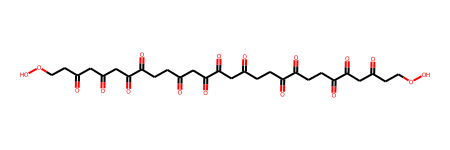

In [5]:
# Plot the first generated molecule
big_smiles_gen(big)

You can also render the graph of connected monomers.
In this case, we don't draw the atoms, but the connected monomers. This can be handy to visualize bigger molecules.

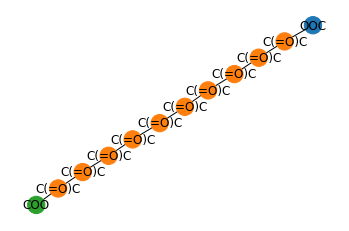

In [6]:
big_smiles_graph(big)

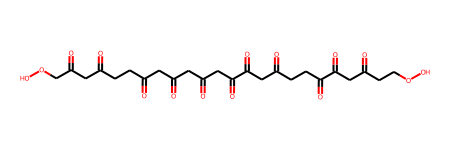

In [7]:
# Generate the second generated molecule
big_smiles_gen(big)

Notice how the repeated C are different because of the stochastic object

## Di-ols with 2-5 middle C total Mw 500

In [8]:
big = "OC{[$][$]C[$][$]}|uniform(12, 72)|CO"
big

'OC{[$][$]C[$][$]}|uniform(12, 72)|CO'

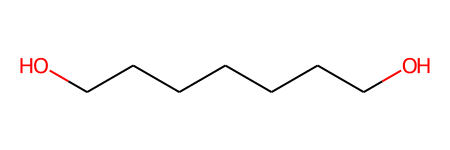

In [9]:
big_smiles_gen(big)

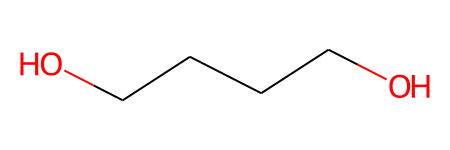

In [10]:
big_smiles_gen(big)

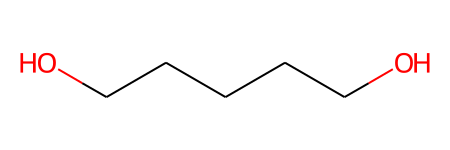

In [11]:
big_smiles_gen(big)

## Di-ols with 2-5 middle Cyclohexane ring total Mw 500

In [12]:
big = "OC{[$][$]C([$])C1CCCCC1[$]}|uniform(84, 420)|CO"
big

'OC{[$][$]C([$])C1CCCCC1[$]}|uniform(84, 420)|CO'

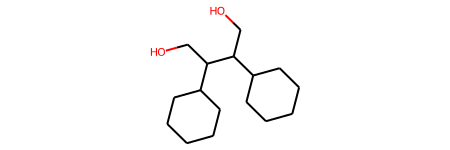

In [13]:
big_smiles_gen(big)

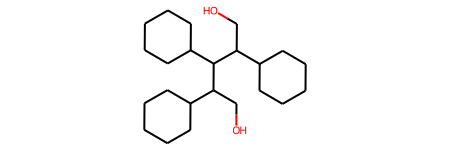

In [14]:
big_smiles_gen(big)

# Polyamides
## Di-Carboxylic Acids

In [15]:
big = "NC{[$][$]C[$][$]}|gauss(60, 24)|COO"
big

'NC{[$][$]C[$][$]}|gauss(60, 24)|COO'

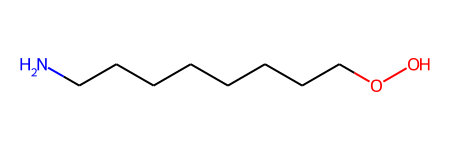

In [16]:
big_smiles_gen(big)

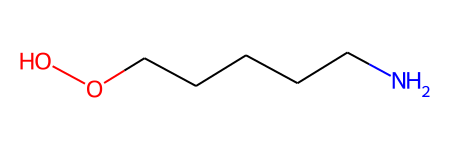

In [17]:
big_smiles_gen(big)

## Diamines

In [18]:
big = "NC{[$][$]C[$][$]}|gauss(60,24)|CN"
big

'NC{[$][$]C[$][$]}|gauss(60,24)|CN'

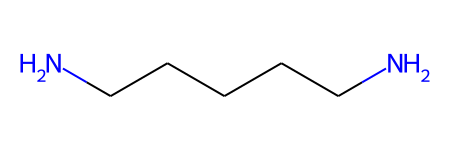

In [19]:
big_smiles_gen(big)

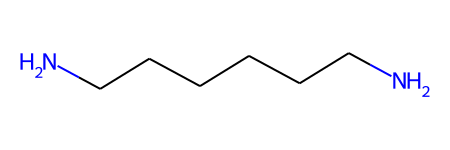

In [20]:
big_smiles_gen(big)

## New: Reaction of diol with di-acid

In [21]:
big = "NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C[$][$]}|uniform(12, 72)|CO"
big

'NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C[$][$]}|uniform(12, 72)|CO'

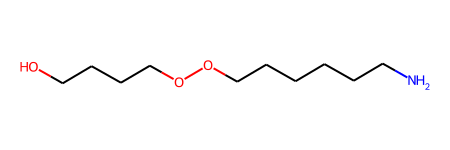

In [22]:
big_smiles_gen(big)

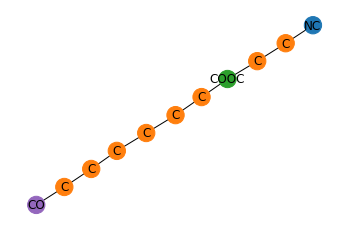

In [23]:
big_smiles_graph(big)

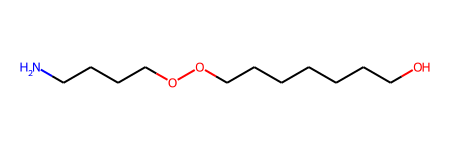

In [24]:
big_smiles_gen(big)

## Same diol and di-acid reaction, but with phenyl ring

In [25]:
big = "NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C([$])C1CCCCC1[$]}|uniform(50, 250)|CO"
big

'NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C([$])C1CCCCC1[$]}|uniform(50, 250)|CO'

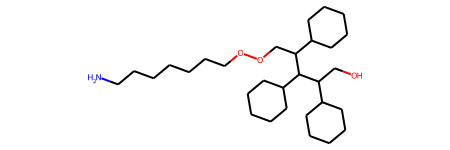

In [26]:
big_smiles_gen(big)

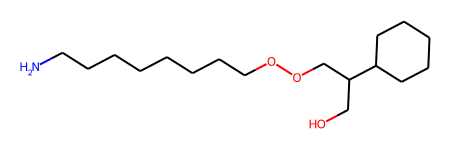

In [27]:
big_smiles_gen(big)

# New! Polyolefins, because a '=' remains

## CH2=CH-(CH2)nCH3  where n varies from 1 to 5

In [28]:
big = "C=C{[$][$]C[$][$]}|uniform(12,60)|C"
big

'C=C{[$][$]C[$][$]}|uniform(12,60)|C'

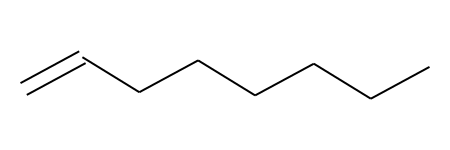

In [29]:
big_smiles_gen(big)

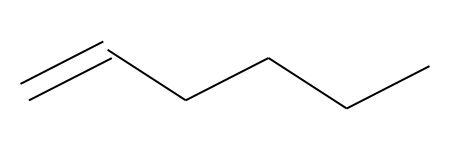

In [30]:
big_smiles_gen(big)

## CH2-CH-(CH2)n-CH=CH2 where n varies from 1 to 3

In [31]:
big = "CC{[$][$]C[$][$]}|uniform(12, 36)|C=C"
big

'CC{[$][$]C[$][$]}|uniform(12, 36)|C=C'

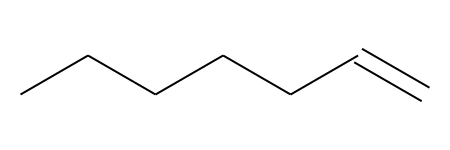

In [32]:
big_smiles_gen(big)

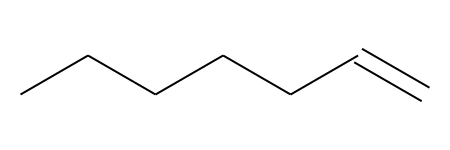

In [33]:
big_smiles_gen(big)

## Classic diblock PS-b-P2VP

In [34]:
big = "[H]{[<][<]C([>])c1ccccc1[>]}|gauss(100,20)|{[<][>]C([<])c1ccncc1[>]}|gauss(100, 20)|[H]"

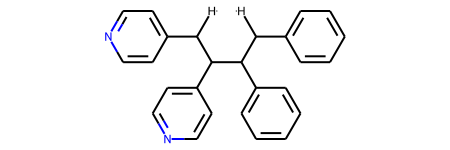

In [35]:
big_smiles_gen(big)

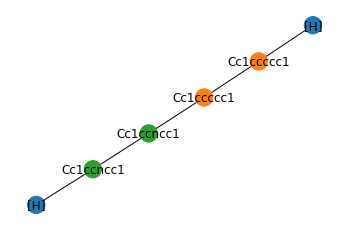

In [36]:
big_smiles_graph(big)

## Polymer in Solvent PS in THF

In [37]:
big = "C1CCOC1.|10%|{[][$]C([$])c1ccccc1; [$][H][]]}|gauss(400,20)|"

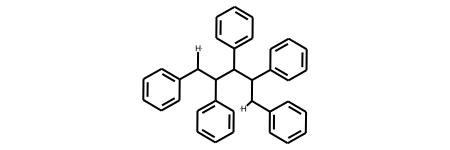

In [38]:
big_smiles_gen(big)

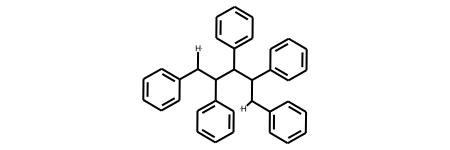

In [39]:
big_smiles_gen(big)

## Poly(acrylic acid butyl - r - acrylamide) (25% acrylamide)

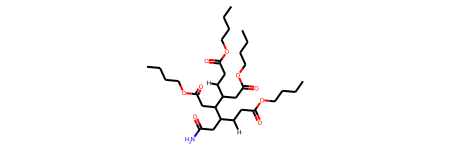

In [40]:
big = "[H]{[>][>|75|]C([<|75|])CC(=O)OCCCC, [<|25|]C([>|25|])CC(=O)N[<]}|gauss(500,50)|[H]"
big_smiles_gen(big)

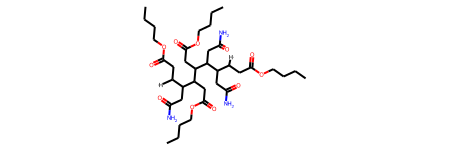

In [41]:
big_smiles_gen(big)

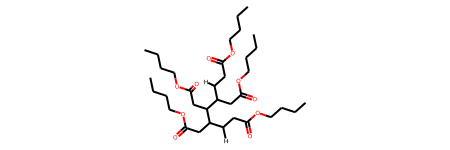

In [42]:
big_smiles_gen(big)

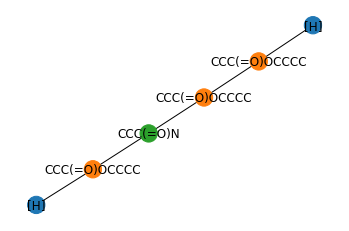

In [43]:
big_smiles_graph(big)

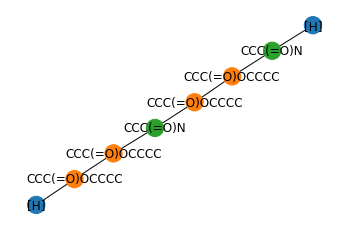

In [44]:
big_smiles_graph(big)

## Vulcanized poly(1,3-butadiene)

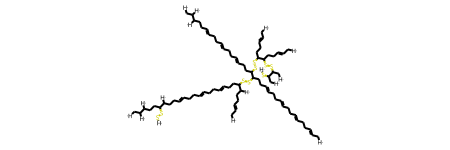

In [45]:
big = "{[][$1|2|]CC=CC[$1|2|], [$1]CC([<])C([<])C[$1], [>]S[$2|10|], [$2]S[$2]; [$1][H], [<][H], [>][H], [$2][H][]}|gauss(1500,500)|"
big_smiles_gen(big)

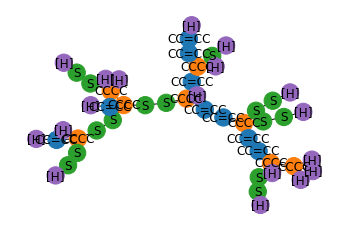

In [46]:
big_smiles_graph(big)

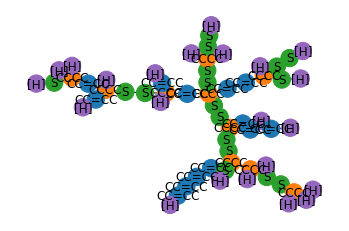

In [47]:
big_smiles_graph(big)

# Example stochastic polymer

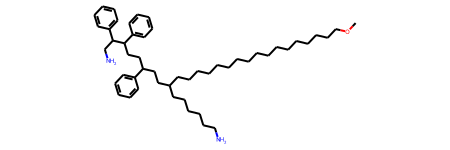

In [48]:
big = "NC{[$] [$|5|]CC[$|5|],[$]C([$])c1ccccc1, [$|0.5|]CCC(C[$|0.1|])CC[$|0.5|]; [$]COC [$]}|uniform(500,1000)|CN"
big_smiles_gen(big)

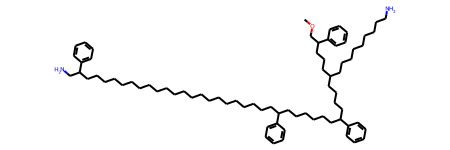

In [49]:
big_smiles_gen(big)

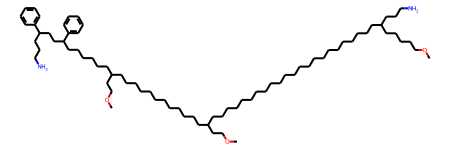

In [50]:
big_smiles_gen(big)

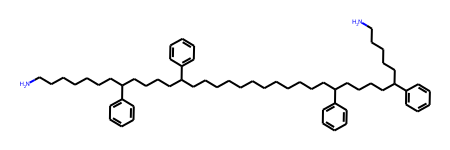

In [51]:
big_smiles_gen(big)

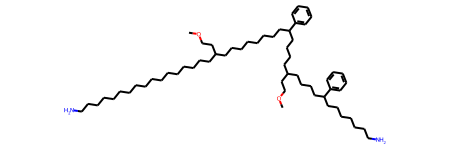

In [52]:
big_smiles_gen(big)

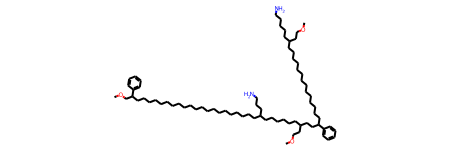

In [53]:
big_smiles_gen(big)

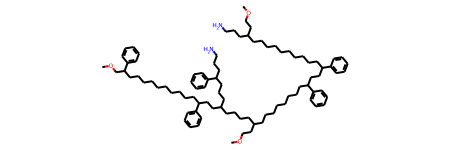

In [54]:
big_smiles_gen(big)

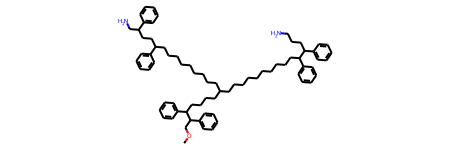

In [55]:
big_smiles_gen(big)

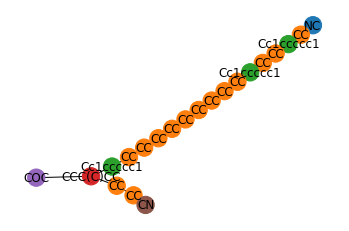

In [56]:
big_smiles_graph(big)

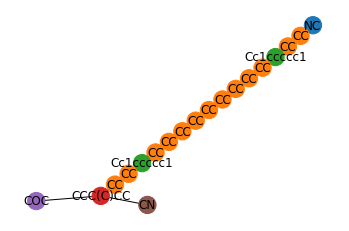

In [57]:
big_smiles_graph(big)

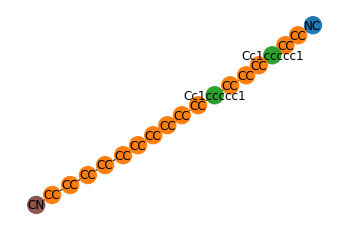

In [58]:
big_smiles_graph(big)

# Motifs

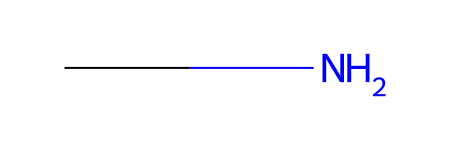

In [59]:
render_svg(moltosvg(Chem.MolFromSmiles("NC")))

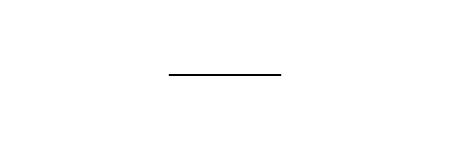

In [60]:
render_svg(moltosvg(Chem.MolFromSmiles("CC")))

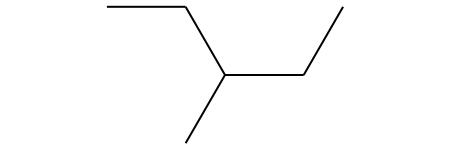

In [61]:
render_svg(moltosvg(Chem.MolFromSmiles("CCC(C)CC")))

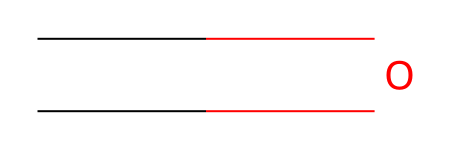

In [62]:
render_svg(moltosvg(Chem.MolFromSmiles("C=O")))

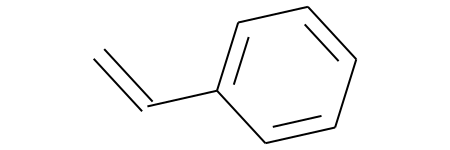

In [63]:
render_svg(moltosvg(Chem.MolFromSmiles("C=Cc1ccccc1")))